In [1]:
import sys
import os

CUR_DIR = os.getcwd()
CUR_DIR = CUR_DIR.replace("\\", "/").replace('/exp','')
sys.path.append(CUR_DIR)

In [2]:
from dotenv import load_dotenv
import os
from app.exa import ExaAPI
from app.schemas.llm import ChatRequest, Message
from pydantic import BaseModel
from app.llm import LiteLLMKit
from app.jina import JinaReader

load_dotenv()

exa_api = ExaAPI(api_key=os.getenv("EXA_API_KEY"))
client = LiteLLMKit(model_name="gpt-4o", temperature=0.7, max_tokens=1024, stream=False)
reader = JinaReader(api_key=os.getenv("JINA_API_KEY"))

In [3]:
from app.routers.market_analysis import MarketAnalyzer

In [4]:
ma = MarketAnalyzer()

In [5]:
res = ma.breakdown_problem("WHats the market for NPC as an service? in AR, MR and gaming?")

In [6]:
res

ProblemBreakdown(questions=['What are the current trends and growth projections for NPC as a service in the AR, MR, and gaming industries?', 'Who are the key players and companies offering NPC as a service in these sectors, and what are their market shares?', 'How is the integration of NPC as a service impacting user experience and engagement in AR, MR, and gaming applications?', 'What are the technological requirements and challenges for implementing NPC as a service in AR, MR, and gaming platforms?', 'How do consumer preferences and behaviors influence the demand for NPC as a service in the AR, MR, and gaming industries?'])

In [7]:
tg = await ma.generate_trend_visualization()

In [8]:
tg

MarketTrendVisualization(x_axis_labels=['2019', '2020', '2021', '2022', '2023', '2024', '2025'], y_axis_labels=['Market Growth Rate', 'Innovation Index', 'Investment Sentiment', 'Technology Adoption', 'Competitive Intensity'], x_axis_name='Year', y_axis_name='Percentage (%)', data=[[55.2, 58.1, 60.3, 63.7, 67.5, 70.2, 73.8], [45.0, 46.4, 48.9, 52.0, 56.5, 61.0, 65.7], [65.3, 62.2, 68.1, 70.3, 72.0, 75.5, 77.9], [50.0, 53.5, 57.0, 61.8, 67.1, 72.5, 78.0], [48.5, 49.9, 52.3, 55.0, 57.5, 59.0, 60.2]], reasoning="The trend data represents a coherent evolution of market dynamics from 2019 to 2025. The 'Market Growth Rate' shows a steady increase, reflecting global economic recovery post-pandemic, increased consumer spending, and expansion in emerging markets. The 'Innovation Index' increases consistently, driven by technological advancements such as AI and 5G, which have accelerated post-pandemic. 'Investment Sentiment' shows fluctuations but an overall upward trend, influenced by market vo

In [9]:
img_tg = ma.visualize_trend(tg)

In [11]:
img_tg

'iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd1xV9RvA8c+97A0XmQqKigjunRv3KFeOHClg28rU1Ka5cpWllmX9tHDhSFNTc2/FXDnKxEUCbpS9x73n9wdy8woKKgjo8369/P263/M95zz3cEDvw/N9jkpRFAUhhBBCCCGEEEIIIUopdUkHIIQQQgghhBBCCCHEg0gCSwghhBBCCCGEEEKUapLAEkIIIYQQQgghhBClmiSwhBBCCCGEEEIIIUSpJgksIYQQQgghhBBCCFGqSQJLCCGEEEIIIYQQQpRqksASQgghhBBCCCGEEKWaJLCEEEIIIYQQQgghRKkmCSwhhBBCCCGEEEIIUapJAksIIYQQQgghhBBClGqSwBJCCCGEEEIIIYQQpZoksIQQQgghhBBCCCFEqSYJLCGEEEIIIYQQQghRqkkCSwghhBBCCCGEEEKUapLAEkIIIcqYiIgIVCoVM2fOLOlQSi2VSsWECRNKOowHyv06Lly4sFiOX6lSJQIDA4vl2KL00el01KxZkylTphTZMZ977jnGjh1bZMcTQgghHocksIQQQohHsHDhQlQqFSqVigMHDuTZrigKHh4eqFQqXnjhhRKIsPCWLVvG7NmzC5w3YcIE/Xt+0B9/f/9ij7mohYWFoVKpMDc3Jz4+vqTDKRPuvR8sLS3x8/Pj008/JTExsaTDe2wHDx5kwoQJZeZ+WL58OZcvX+add97Rj129epXnn38eW1tb/Pz82LBhQ5791qxZg7OzMwkJCXm2ffDBB3z33XfcuHGjWGMXQgghCsO4pAMQQgghyjJzc3OWLVtGixYtDMb37t3LlStXMDMzK6HICm/ZsmWcPn2

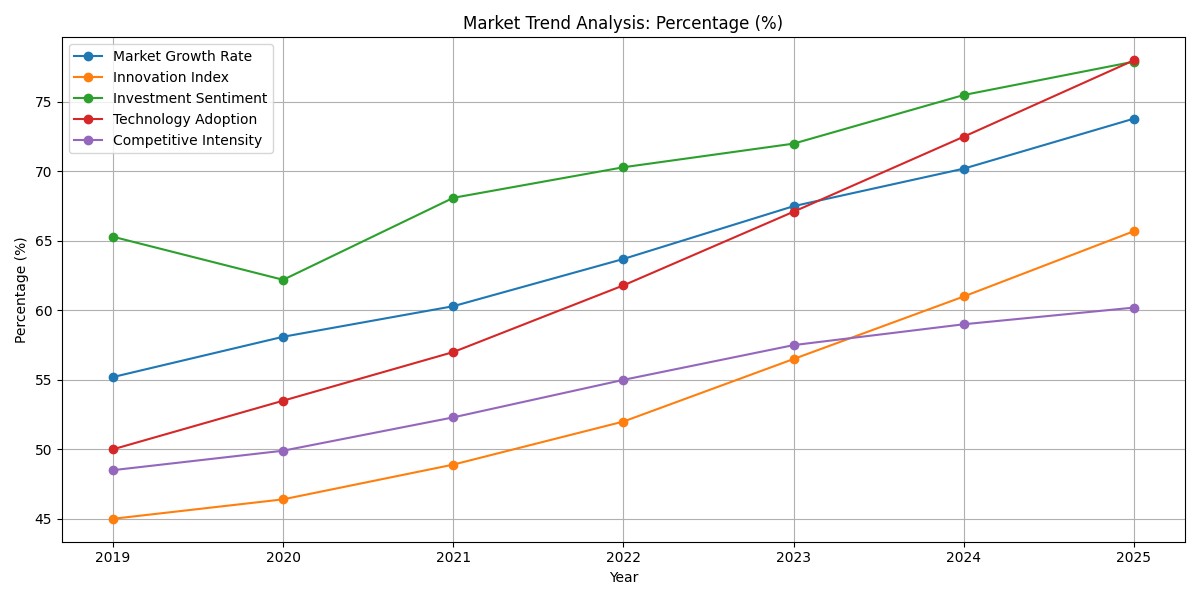

In [17]:
import base64
from io import BytesIO

# convert base64 to image
def base64_to_image(base64_string):
    imgdata = base64.b64decode(base64_string)
    return BytesIO(imgdata)

img = base64_to_image(img_tg)
# display image
from PIL import Image

Image.open(img)

In [10]:
ma.perform_analysis()

KeyboardInterrupt: 

In [ ]:
report = ma.compile_comprehensive_report()

In [ ]:
str(ma.reports)

In [ ]:
final_report = ma.get_report()

In [ ]:
print(final_report.comprehensive_report)